## Car Price Prediction

### Importing necessary modules and libraries

In [196]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics


In [197]:
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data Preparation

In [198]:
df. shape

(301, 9)

In [199]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [200]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [201]:
df=df[['Year','Selling_Price','Present_Price','Driven_kms','Fuel_Type','Selling_type','Transmission','Owner']]
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [202]:
print("Transmission: ", df["Transmission"].unique())
print('\n')
print("Fuel Type:", df["Fuel_Type"].unique())

Transmission:  ['Manual' 'Automatic']


Fuel Type: ['Petrol' 'Diesel' 'CNG']


In [203]:
print( df.groupby("Fuel_Type").size())
print('\n')
print(df.groupby("Transmission").size())

Fuel_Type
CNG         2
Diesel     60
Petrol    239
dtype: int64


Transmission
Automatic     40
Manual       261
dtype: int64


In [204]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [205]:
df['Current Year']=2023
df['no_year']=df['Current Year']- df['Year']
df.drop(['Year'],axis=1,inplace=True)

df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual,Current Year,no_year
0,3.35,5.59,27000,0,0,1,0,1,2023,9
1,4.75,9.54,43000,0,1,0,0,1,2023,10
2,7.25,9.85,6900,0,0,1,0,1,2023,6
3,2.85,4.15,5200,0,0,1,0,1,2023,12
4,4.60,6.87,42450,0,1,0,0,1,2023,9


### Exploratory Data Analysis

In [194]:
df.describe()

,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual,Current Year,no_year
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.0,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,0.199336,0.794020,0.352159,0.867110,2023.0,9.372093
std,5.082812,8.642584,38886.883882,0.247915,0.400166,0.405089,0.478439,0.340021,0.0,2.891554
min,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023.0,5.000000
25%,0.900000,1.200000,15000.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2023.0,7.000000
50%,3.600000,6.400000,32000.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2023.0,9.000000
75%,6.000000,9.900000,48767.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2023.0,11.000000
max,35.000000,92.600000,500000.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2023.0,20.000000


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Selling_Price            301 non-null    float64
 1   Present_Price            301 non-null    float64
 2   Driven_kms               301 non-null    int64  
 3   Owner                    301 non-null    int64  
 4   Fuel_Type_Diesel         301 non-null    uint8  
 5   Fuel_Type_Petrol         301 non-null    uint8  
 6   Selling_type_Individual  301 non-null    uint8  
 7   Transmission_Manual      301 non-null    uint8  
 8   Current Year             301 non-null    int64  
 9   no_year                  301 non-null    int64  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 15.4 KB


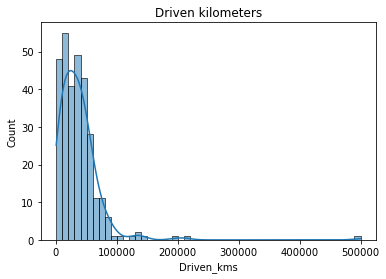

In [178]:
sns.histplot(df['Driven_kms'], kde=True)
plt.title("Driven kilometers")
plt.show()

In [179]:
df.corr()

,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual,Current Year,no_year
Selling_Price,1.000000,0.878914,0.029187,-0.088344,0.552339,-0.540571,-0.550724,-0.367128,NaN,-0.236141
Present_Price,0.878914,1.000000,0.203618,0.008058,0.473390,-0.465326,-0.512121,-0.348776,NaN,0.047192
Driven_kms,0.029187,0.203618,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510,NaN,0.524342
Owner,-0.088344,0.008058,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316,NaN,0.182104
Fuel_Type_Diesel,0.552339,0.473390,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643,NaN,-0.064315
Fuel_Type_Petrol,-0.540571,-0.465326,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013,NaN,0.059959
Selling_type_Individual,-0.550724,-0.512121,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240,NaN,0.039896
Transmission_Manual,-0.367128,-0.348776,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000,NaN,-0.000394
Current Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_year,-0.236141,0.047192,0.524342,0.182104,-0.064315,0.059959,0.039896,-0.000394,NaN,1.000000


## Training and Testing

In [180]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [181]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R2 score: ", r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score:  0.875536331381875
MAE: 1.2699697249044748
MSE: 3.544003465110353
RMSE: 1.8825523804426672


/Users/avantika/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

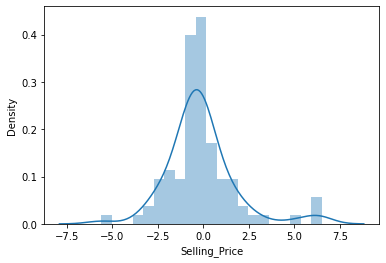

In [182]:
sns.distplot(y_test-y_pred)

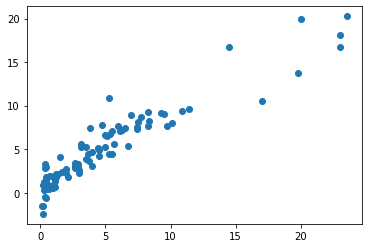

In [206]:
plt.scatter(y_test,y_pred)